## Problem Statement: Campaign for selling personal loans

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of
customers who are also borrowers (asset customers) is quite small, and the bank is
interested in expanding this base rapidly to bring in more loan business and in the process,
earn more through the interest on loans. In particular, the management wants to explore
ways of converting its liability customers to personal loan customers (while retaining them
as depositors). A campaign that the bank ran last year for liability customers showed a
healthy conversion rate of over 9% success. This has encouraged the retail marketing
department to devise campaigns with better target marketing to increase the success ratio
with minimal budget.

The department wants to build a model that will help them identify the potential customers
who have higher probability of purchasing the loan. This will increase the success ratio while
at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage,
securities account, etc.), and the customer response to the last personal loan campaign
(Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal
loan that was offered to them in the earlier campaign.

### Column descriptions

ID - Customer ID, Age- Customer's age in completed years, Experience - #years of professional experience, Income - Annual income of the customer, ZIPCode - Home Address ZIP code, Family - Family size of the customer, CCAvg - Avg. spending on credit cards per month, Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional,  Mortgage - Value of house mortgage if any, Personal Loan - Did this customer accept the personal loan offered in the last
campaign?, Securities - Account Does the customer have a securities account with the bank?, CD Account - Does the customer have a certificate of deposit (CD) account with the bank?, Online - Does the customer use internet banking facilities?, CreditCard - Does the customer uses a credit card

In [1]:
#importing the needed packages
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


#Setting style for seaborn charts
sns.set_context("talk", font_scale=0.75, rc={"lines.linewidth": 2.5})

In [2]:
# Reading the training data set to study the features

train_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
train_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
# Let us inspect the attribute information

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### intermediate observation :

Interesting finding from above is, there seems to be several categorical features like account types (CD account, credit card account, Securities account, online account etc.) from the data displayed above, we need to find out whether these are really the integer types or need to be changed as categorical types with 0 & 1 being the only possible values. Default pandas read csv has marked these attributes as integer(int64) type.

In [4]:
#inspecting the max, min, median, mean, count to study the data further

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Understanding from above :

1. ID seems to be irrelevant 
2. Age seems to be ranging between 23 and 67 with median/mean ~ 45. At first glance, this data looks okay without outliers
3. Experience - seem to have outlier with NEGATIVE value in the data Need to investigate this further
4. Income - Not much evidence from min and max observations
5. Zip code - We will study this data more, as we might get geographical significance for people who might have bought the loan
6. Family - Looks okay with values of family size ranging from 1 to 4. Looks okay without outliers
7. CCAvg - Not much information given on this field, need to study the distribution
8. Education - Same as above, need to study the distribution. Not much evident information has been disclosed
9. Personal Loan - This would be the target to predict, we will assess whether given data in problem statement is right i.e. only 480 people purchased personal loan with 9.6% from overall population of training set
10. Mortgage account alone looks like stand out from other account? minimum is zero and max is 635, median and mean looks weird
11. Security Account till Credit card account - seems to be categorical features

### Need to inspect further to study further from distribution :
Income, Zip code, CCAvg, Education, Mortgage

### Very evident outlier : 
Experience as it has negative values

### Features seeming okay at first glance
Age, Categorical features from security account till credit card account

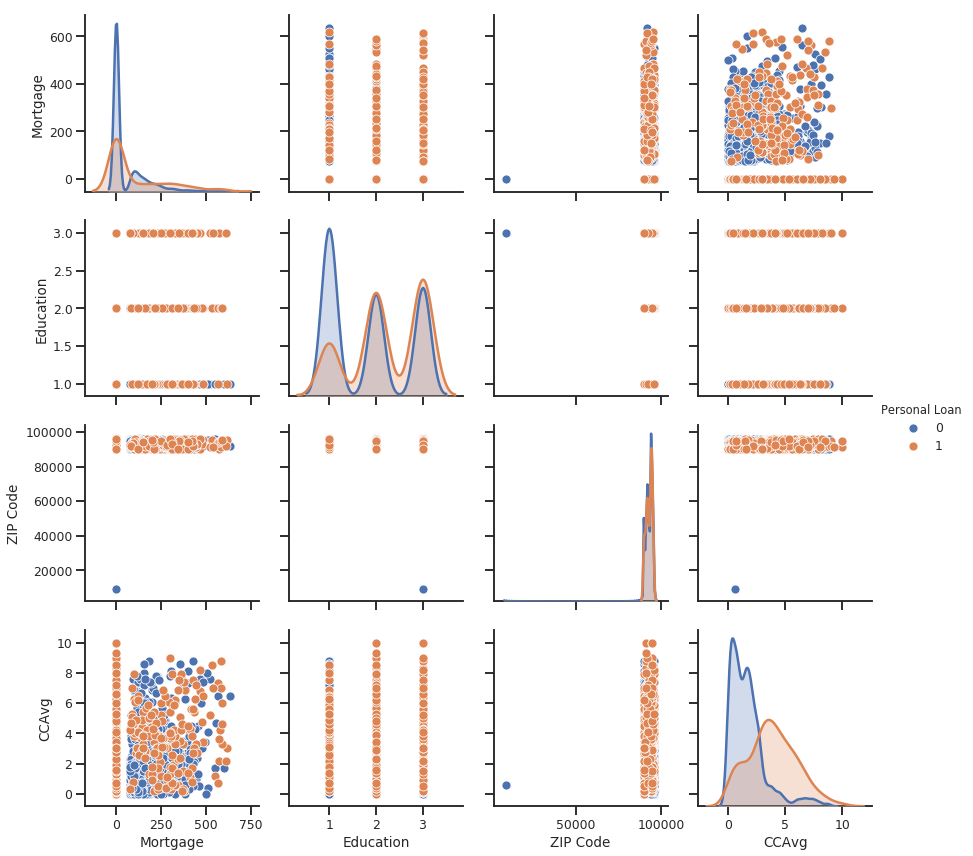

In [5]:
#straight away plotting the pair plot for the features wanting to study further
sns.pairplot(train_df, 
             vars=["Mortgage", "Education", "ZIP Code", "CCAvg"], 
             height = 3, 
             diag_kind="kde", hue="Personal Loan")

### Analysis of Mortgage :
1) Mortgage vs CC Avg - seems to be linearly separable when placed in higher order feature space
2) Mortgage vs Zip code - Seems to have outlier, need to inspect Zip code separately
3) Mortgage vs Education - seems to be linearly separable when placed in higher order feature space
4) Distribution of Mortgage - There are multimodal peaks for both classes 0 & 1 of personal loan. Need to investigate further

### Analysis of Education
Clearly there are 3 classes of education - It can be split into 3 distinct categorical features to study further

### Analysis of Zip Code
There is ONE outlier while studying interaction of zip code with every other feature varibale, need to inspect this outlier

### Analysis of CC Avg
There are multimodal peaks for class zero and almost close to symmetrical for class one except for semi second peak in distribution

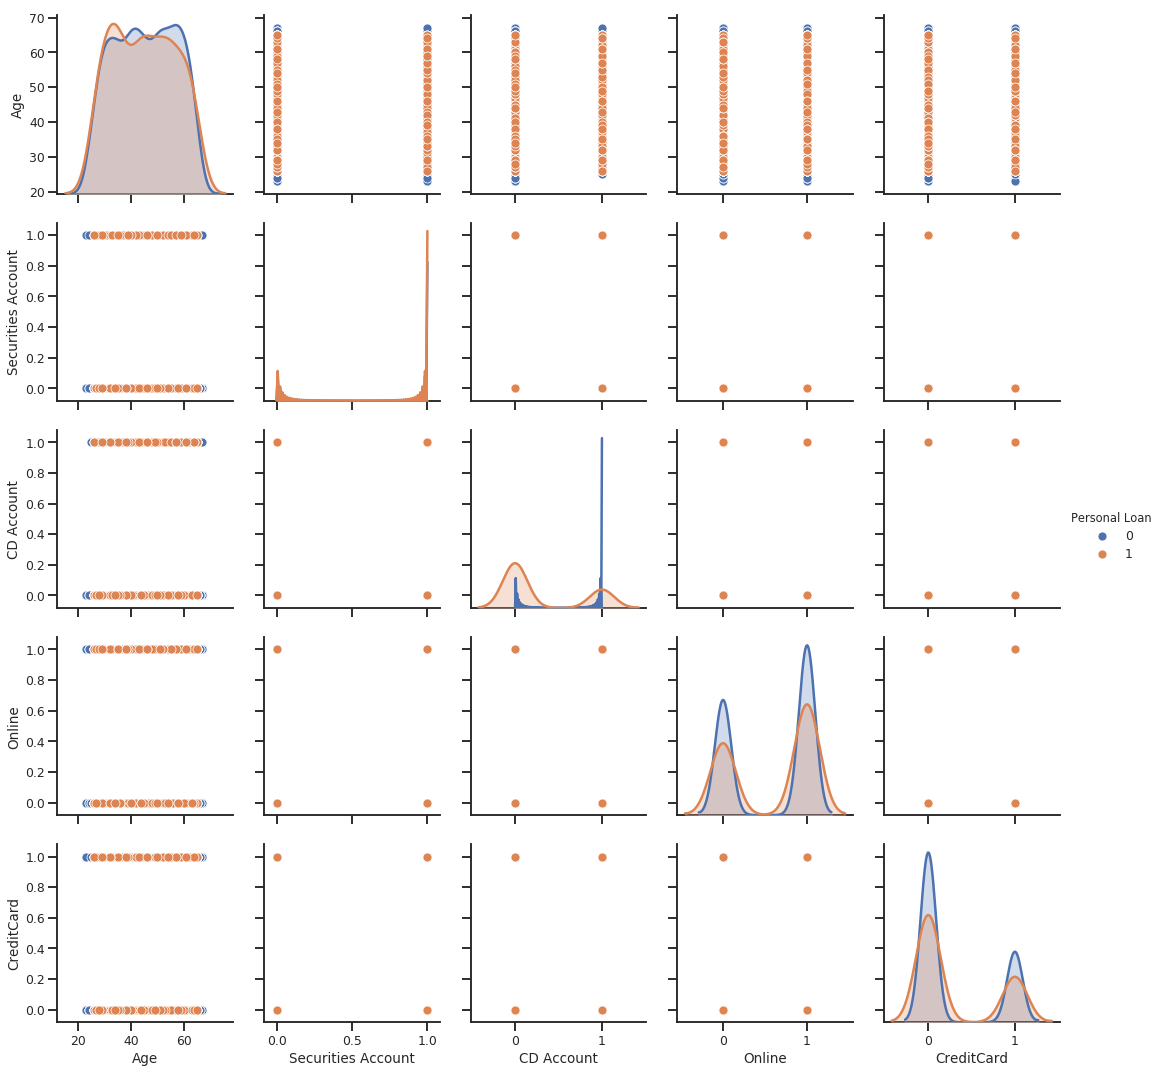

In [6]:
#straight away plotting the pair plot for the features that seemed okay from dataset
sns.pairplot(train_df, 
             vars=["Age", "Securities Account", "CD Account", "Online", "CreditCard"], 
             height = 3, 
             diag_kind="kde", hue = "Personal Loan")

### Analysis of Age, Securities Account, CD Account, Online, CreditCard

1) Nothing abnormal observed, there are signficant overalp in clases but may be separable in higher dimensions. Will investigate further on securities, CD and Online

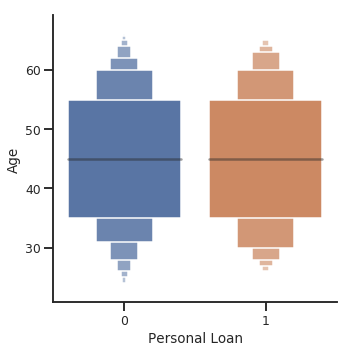

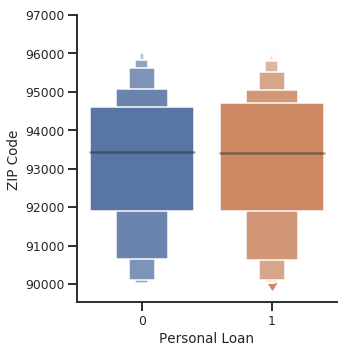

In [7]:
#Plotting the age & Zip code Vs Personal Loan - Box Plot 

sns.catplot(x="Personal Loan", y="Age", kind="boxen", data=train_df);
sns.catplot(x="Personal Loan", y="ZIP Code", kind="boxen", data=train_df[train_df['ZIP Code'] > 20000]);


### Observation

Clearly, Zip Code < 20000 is outlier. Taking the outlier out of equation, both Age and Zip code have significant overlap in classes and it seem separable if put in higher dimensional order in feature space

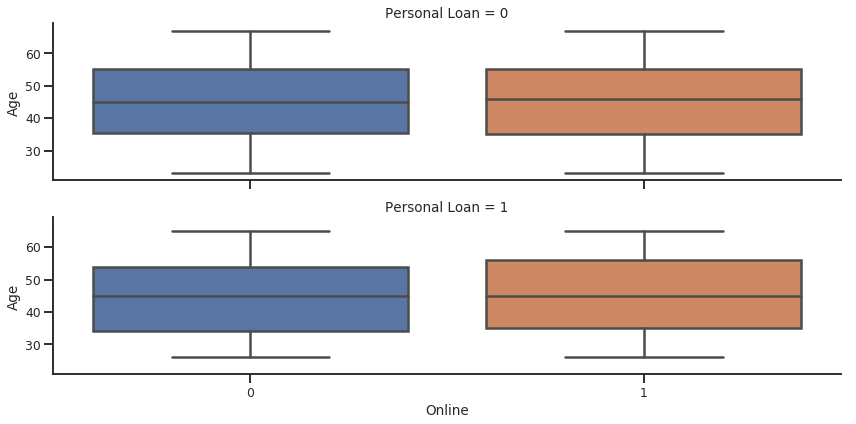

In [8]:
#studing similar plot for other accounts - Online Account
sns.catplot(x="Online", y="Age", row="Personal Loan",
                kind="box", height=3, aspect=4,
                data=train_df)

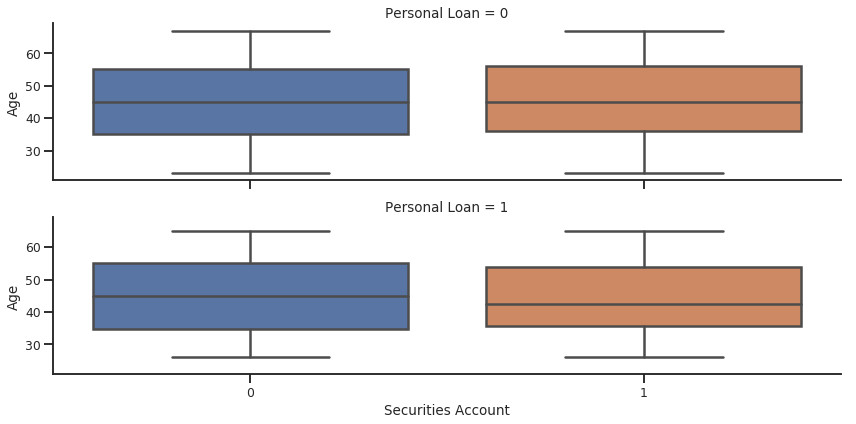

In [9]:
#studing similar plot for other accounts - Security Accounts
sns.catplot(x="Securities Account", y="Age", row="Personal Loan",
                kind="box", height=3, aspect=4,
                data=train_df)

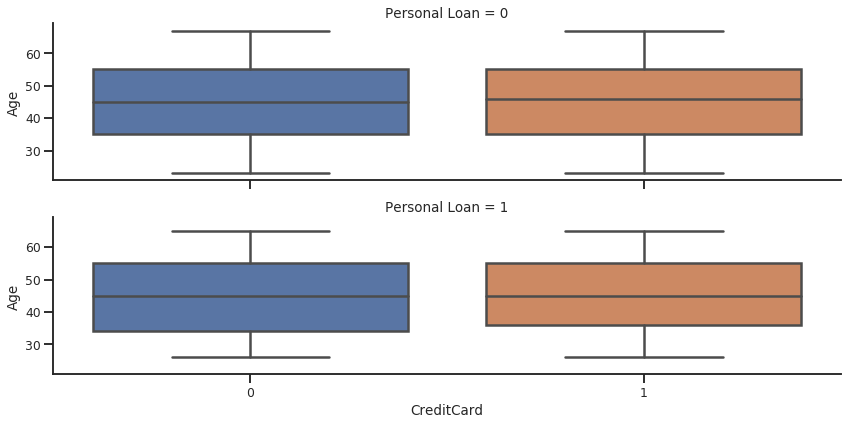

In [10]:
#studing similar plot for other accounts - Credit Card
sns.catplot(x="CreditCard", y="Age", row="Personal Loan",
                kind="box", height=3, aspect=4,
                data=train_df)

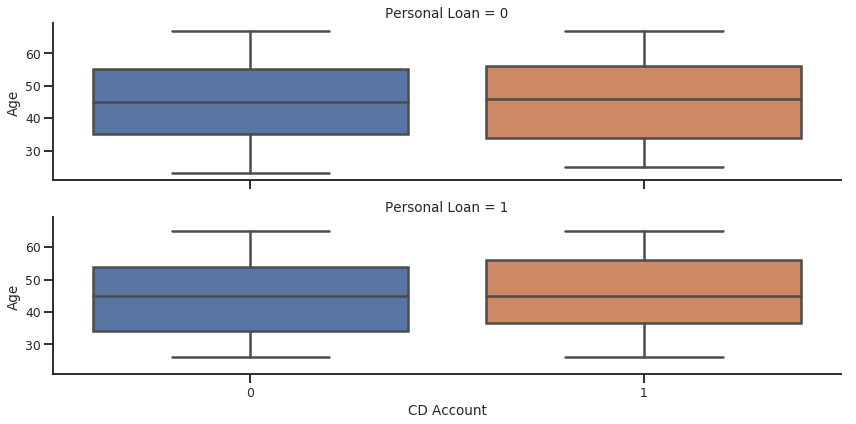

In [11]:
#studing similar plot for other accounts - CD Account
sns.catplot(x="CD Account", y="Age", row="Personal Loan",
                kind="box", height=3, aspect=4,
                data=train_df)

### Observation from Last Above FOUR BOX Plots 

By studying the box plots of CD Account, Online Account, Securities Account & Credit Card Account --> It is very evident that there is significant overlap in classes. Proceeding further!

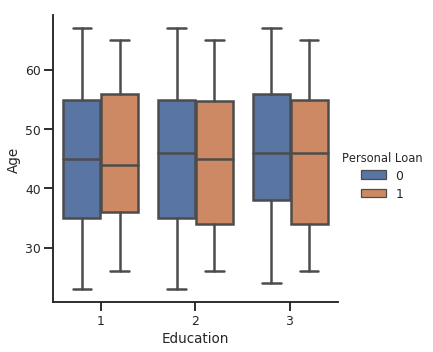

In [12]:
# Studing Education - Box Plot to look for personal loan class Vs Education
sns.catplot(x="Education", y="Age", hue="Personal Loan", kind="box", data=train_df);

### Observation for Education
1) This can be converted as categorical variables for 1, 2 and 3 --> Very evident for overlap in classes like other features

#### small signs of customers with higher education & young age has better chance of purchasing loan + customer with lower education & Old age has better chance of purchasing loan based on above box plot - VERY SMALL INDICATIONS THOUGH, NOT MUCH SIGNIFICANT

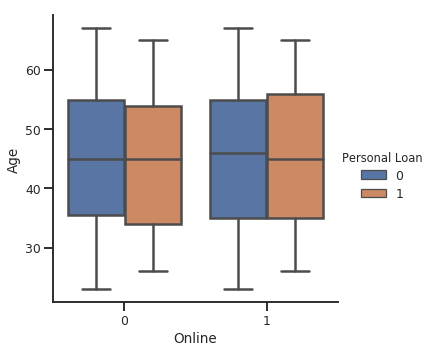

In [13]:
sns.catplot(x="Online", y="Age", hue="Personal Loan", kind="box", data=train_df);

#### small signs of customers having online account & older age has better chance of purchasing loan + customer with NO Online account & younger age has better chance of purchasing loan based on above box plot - VERY SMALL INDICATIONS THOUGH, NOT MUCH SIGNIFICANT

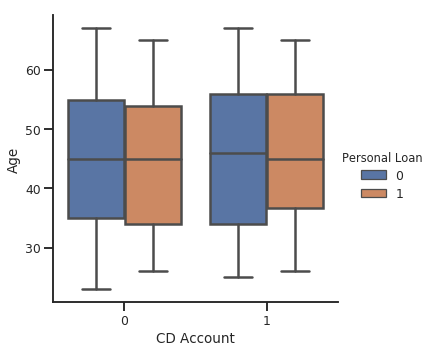

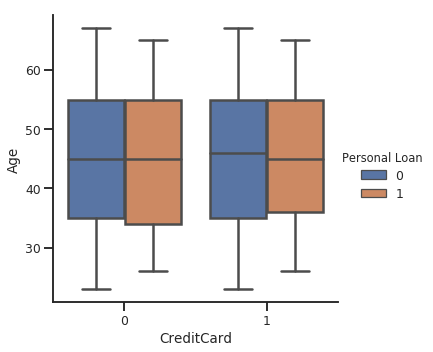

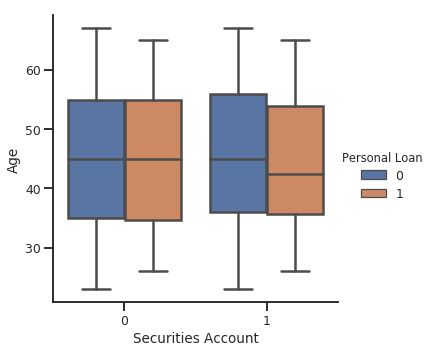

In [14]:
sns.catplot(x="CD Account", y="Age", hue="Personal Loan", kind="box", data=train_df);
sns.catplot(x="CreditCard", y="Age", hue="Personal Loan", kind="box", data=train_df);
sns.catplot(x="Securities Account", y="Age", hue="Personal Loan", kind="box", data=train_df);

#### VERY SMALL SIGNS observed with younger age customers with NO Securities or CD or Credit card account has better chance of purchasing loan as well. VERY SMALL INDICATIONS though, NOT a significant indicator

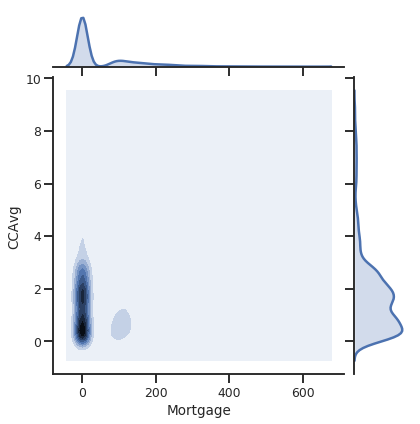

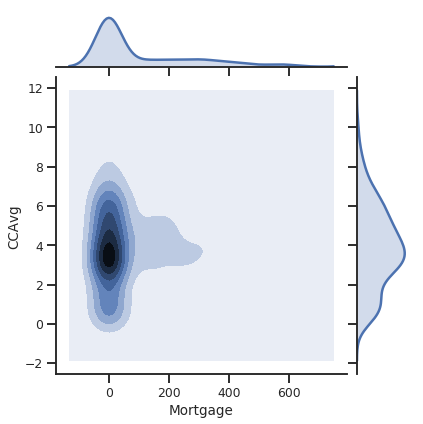

In [15]:
sns.jointplot(x="Mortgage", y="CCAvg", kind='kde', data=train_df[train_df['Personal Loan'] == 0])
sns.jointplot(x="Mortgage", y="CCAvg", kind='kde', data=train_df[train_df['Personal Loan'] == 1])

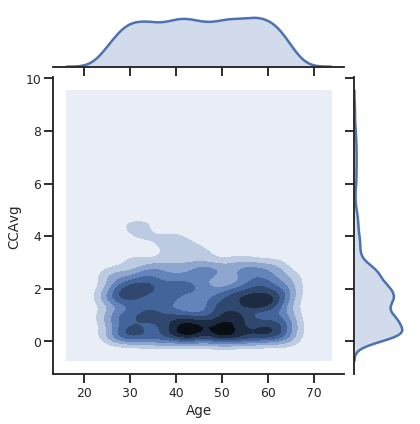

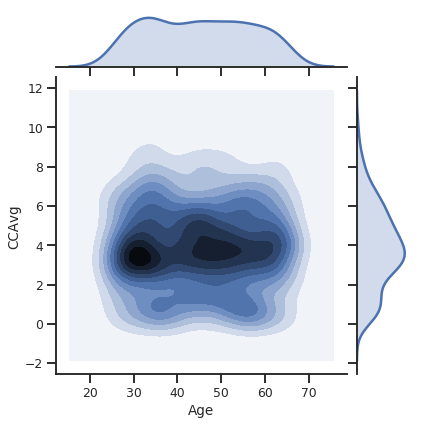

In [16]:
sns.jointplot(x="Age", y="CCAvg", kind='kde', data=train_df[train_df['Personal Loan'] == 0])
sns.jointplot(x="Age", y="CCAvg", kind='kde', data=train_df[train_df['Personal Loan'] == 1])

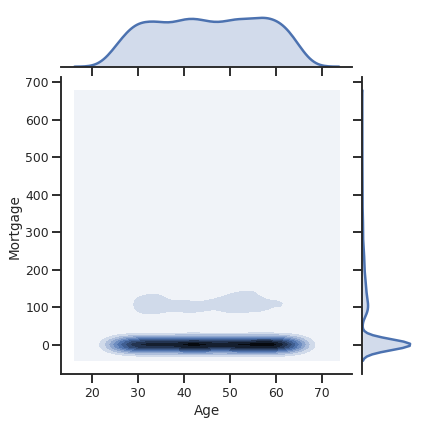

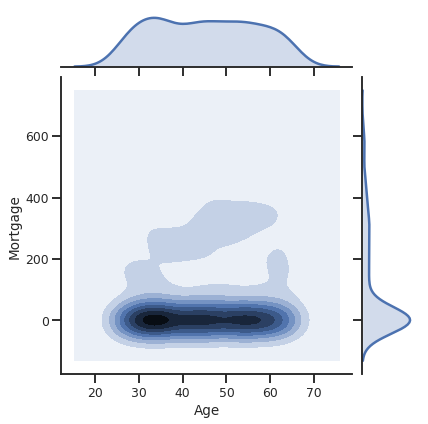

In [17]:
sns.jointplot(x="Age", y="Mortgage", kind='kde', data=train_df[train_df['Personal Loan'] == 0])
sns.jointplot(x="Age", y="Mortgage", kind='kde', data=train_df[train_df['Personal Loan'] == 1])

### INTERESTING Observations from above distribution joint plots with respect to Target Variable

#### observation 1
Customers who DID NOT purchase personal loan --> They had very LOW CCAvg, LOW Mortgage between 30-60 Age groups

#### observation 2
Customers who DID purchase personal loan --> They had CCAvg ranging between 0 and 8, with most frequent customers between around 4-7 (which is SIGNIFICANTLY higher than observation 1) & VARYING MORTGAGE between 30-60 Age groups

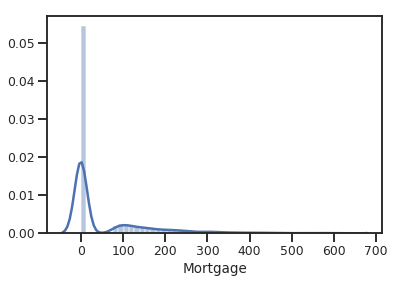

In [18]:
#It is also evident only few customers have postive mortgage values 
sns.distplot(train_df["Mortgage"]);

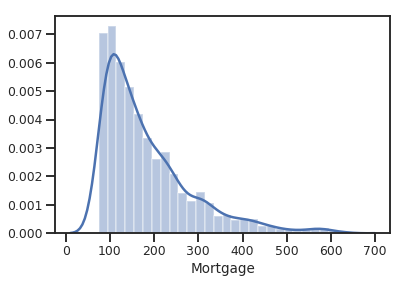

In [19]:
sns.distplot(train_df[train_df.Mortgage > 0].Mortgage)

### Observation on Mortgage
#### More common Mortgage values with customers who have mortgage is around 100-300 approximately

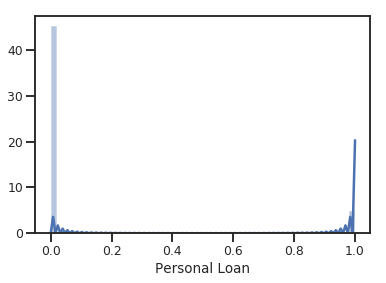

In [20]:
sns.distplot(train_df["Personal Loan"]);

Text(0.5, 1.0, 'Count of Customers Vs Personal Loan')

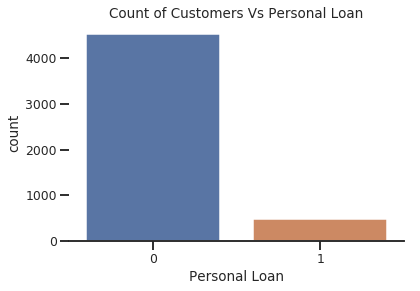

In [21]:
sns_plot = sns.countplot(x="Personal Loan", data=train_df)
sns.despine(left=True)
plt.title("Count of Customers Vs Personal Loan")

In [22]:
train_df.groupby(by="Personal Loan", sort=True).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


### Observation on Target Variable - Personal Loan

Like given in problem description, customers who accepted the personal loan offered is only 480, out of entire 5000 population in training set

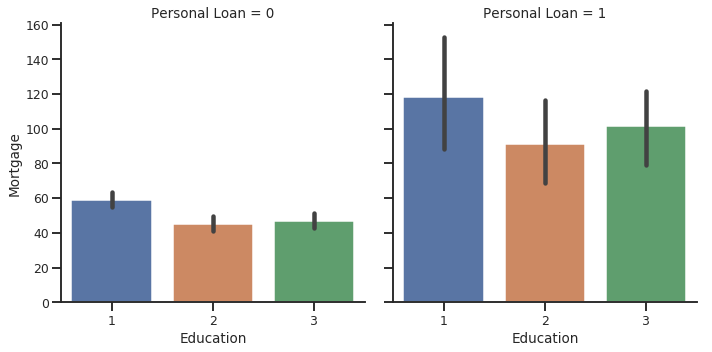

In [23]:
sns.catplot(x="Education", y="Mortgage", col="Personal Loan", kind='bar', data=train_df, legend=True)

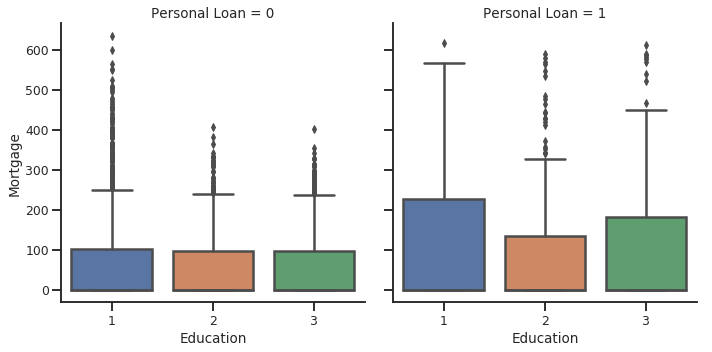

In [24]:
sns.catplot(x="Education", y="Mortgage", col="Personal Loan", kind='box', data=train_df, legend=True)

### Another interesting Observation on target variable with respect to Education & Mortgage Vs Target

There are lot of customers who has higher mortgage values between 100 and 300 --> they seem to have purchased personal loan, in particular, this pattern seems to be common with education level 1 and 3 to be specifci

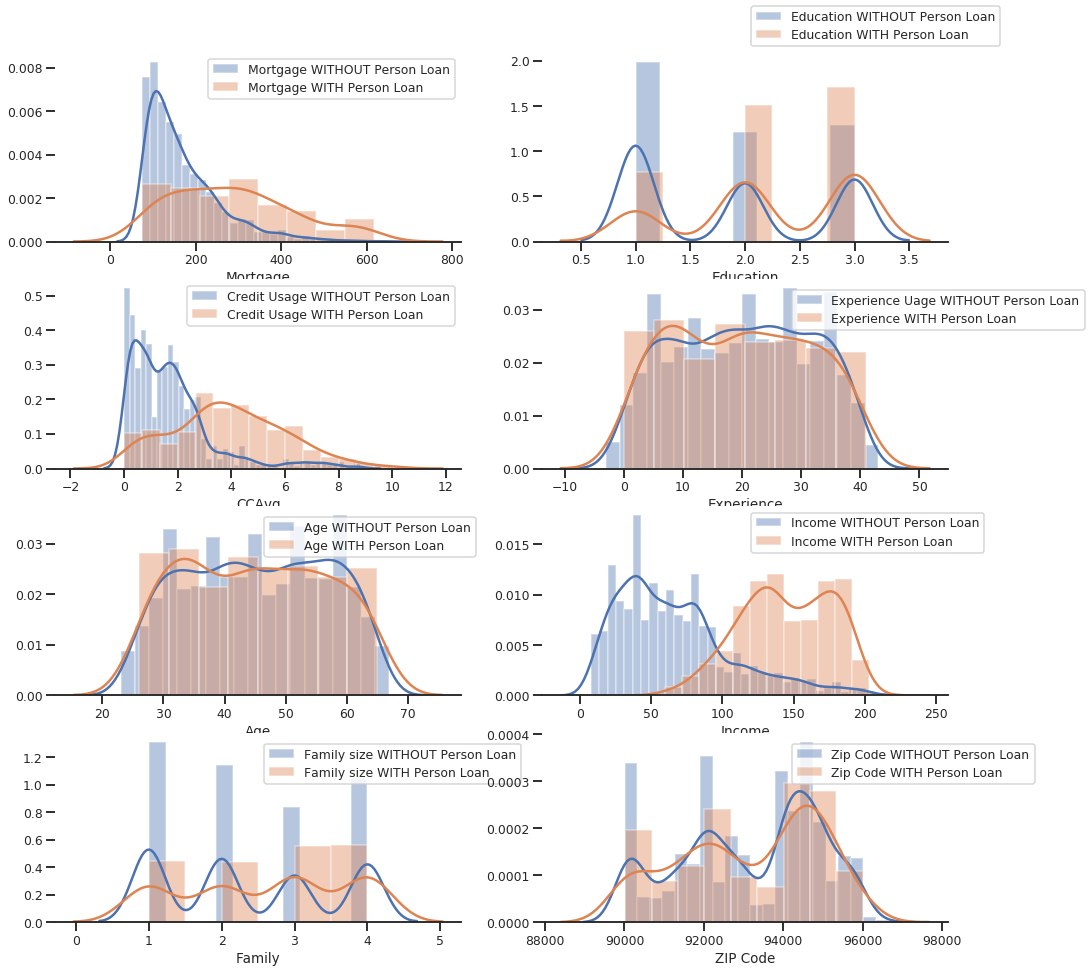

In [25]:
########## Studying the target variable distribution with respect to other input feature variables################

f, axes = plt.subplots(4,2, figsize=(16, 16), sharex=False)

sns.distplot(train_df[(train_df.Mortgage > 0) &
          (train_df['Personal Loan'] == 0)].Mortgage, label="Mortgage WITHOUT Person Loan", ax=axes[0,0])
sns.distplot(train_df[(train_df.Mortgage > 0) &
          (train_df['Personal Loan'] == 1)].Mortgage, label="Mortgage WITH Person Loan", ax=axes[0,0])

sns.distplot(train_df[train_df['Personal Loan'] == 0].Education, label="Education WITHOUT Person Loan", ax=axes[0,1])
sns.distplot(train_df[train_df['Personal Loan'] == 1].Education, label="Education WITH Person Loan", ax=axes[0,1])

sns.distplot(train_df[train_df['Personal Loan'] == 0]['CCAvg'], label="Credit Usage WITHOUT Person Loan", ax=axes[1,0])
sns.distplot(train_df[train_df['Personal Loan'] == 1]['CCAvg'], label="Credit Usage WITH Person Loan", ax=axes[1,0])

sns.distplot(train_df[train_df['Personal Loan'] == 0]['Experience'], label="Experience Uage WITHOUT Person Loan", ax=axes[1,1])
sns.distplot(train_df[train_df['Personal Loan'] == 1]['Experience'], label="Experience WITH Person Loan", ax=axes[1,1])

sns.distplot(train_df[train_df['Personal Loan'] == 0]['Age'], label="Age WITHOUT Person Loan", ax=axes[2,0])
sns.distplot(train_df[train_df['Personal Loan'] == 1]['Age'], label="Age WITH Person Loan", ax=axes[2,0])

sns.distplot(train_df[train_df['Personal Loan'] == 0]['Income'], label="Income WITHOUT Person Loan", ax=axes[2,1])
sns.distplot(train_df[train_df['Personal Loan'] == 1]['Income'], label="Income WITH Person Loan", ax=axes[2,1])

sns.distplot(train_df[train_df['Personal Loan'] == 0]['Family'], label="Family size WITHOUT Person Loan", ax=axes[3,0])
sns.distplot(train_df[train_df['Personal Loan'] == 1]['Family'], label="Family size WITH Person Loan", ax=axes[3,0])

sns.distplot(train_df[(train_df['ZIP Code'] > 20000) &
          (train_df['Personal Loan'] == 0)]['ZIP Code'], label="Zip Code WITHOUT Person Loan", ax=axes[3,1])
sns.distplot(train_df[(train_df['ZIP Code'] > 20000) &
          (train_df['Personal Loan'] == 1)]['ZIP Code'], label="Zip Code WITH Person Loan", ax=axes[3,1])


axes[0,0].legend(bbox_to_anchor=(1, 1), loc='best')
axes[0,1].legend(bbox_to_anchor=(0.5, 1), loc='best')
axes[1,0].legend(bbox_to_anchor=(1, 1), loc='best')
axes[1,1].legend(bbox_to_anchor=(0.6, 0.7), loc='best')
axes[2,0].legend(bbox_to_anchor=(0.5, 0.7), loc='best')
axes[2,1].legend(bbox_to_anchor=(0.5, 1), loc='best')
axes[3,0].legend(bbox_to_anchor=(0.5, 0.7), loc='best')
axes[3,1].legend(bbox_to_anchor=(0.6, 0.7), loc='best')


sns.despine(left=True)
#f.legend()

## Summary of above Target Variable Distribution :-

1) Mortgage, CCAvg and Income features are continuous and have very visible influence on customers purchasing personal loan. i.e., a) relatively higher income customers have better probability of purchasing personal loan b) People who have higher mortgage have better probability of purchasing personal loan c) relatively higher credit usage has higher probability of purchasing personal loan

Family size also seem to play a small role, higher family size customers seem to have higher chances of purchasing personal loan from the bank (on a relative scale compared to smaller family size).

#### but can there be multi collinearity between Credit usage, income and mortgage? i.e. People with higher income will obviously tend to have higher credit usage, mortgage & have chances of buying personal loan? We will find it out by deriving correlation between input attributes & if these 3 interactions have higher dependency/correlation - they have to be dropped except for one feature as it will not add any value to classifciation problem

##### Other inferences 1 :- 
1) Age, Zip code and Experience doesn't convey any evident classification distribution individually. 
##### Other inferences 2 :-
2) Education and Family seem to have some influence in classification of people purchasing personal loan. Can these play a role of being a key feature along with age or experience? May be, may be not! Need to find out during modeling only

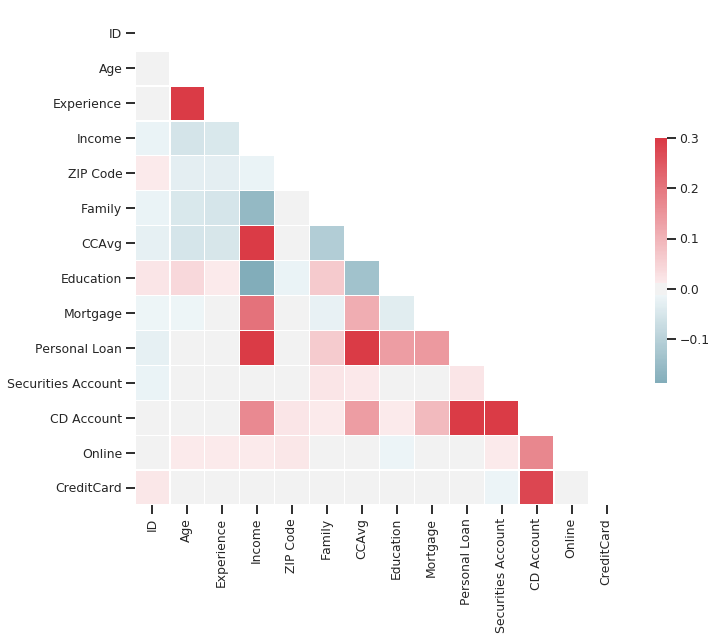

In [26]:
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Conclusion from Correlation Matrix :

1:- We can infer that, CC Avg, Mortgage and Income seem to have some kind of correlation between them. With the value being around 0.3, it might be smaller value still, but these are the strongest correlation among all features between them on relative scale

2:- Age & Experience seem to have strongest correlation between them

#### KEY CONCLUSION:- One of (income, CC Avg, Mortgage) or all 3 + one of (Age, Experience) + Family size + Zip(if any location can be extracted from zip, it would be great categorical candidate) + Other categorical feature are essential candidates to start on base model

#### Feature Types : Categorical
Family, Education, Securities, CD Account, Online, Credit Card

#### Feature Types : Continuous
Age, Experience, Income, Zip Code, CC Avg, Mortgage

#### Feature Types : Target to classify
Personal Loan

#### Features to IGNORE
ID

In [27]:
##############################################################################################################################
#### THERE ARE 312 customers, i.e. majority of minority class of having to purchase personal loan with MORTGAGE ZERO. ########
######################## i.e. we cannot drop this feature, it has to be used in combination with CC Avg & Income #############
##############################################################################################################################

train_df[(train_df.Mortgage == 0) &
          (train_df['Personal Loan'] == 1)].count()

ID                    312
Age                   312
Experience            312
Income                312
ZIP Code              312
Family                312
CCAvg                 312
Education             312
Mortgage              312
Personal Loan         312
Securities Account    312
CD Account            312
Online                312
CreditCard            312
dtype: int64

In [28]:
##############################################################################################################################
#### Wish Zip code carries some location information, but below random inspection SHOWS OTHERWAY! i.e. NOT USEFUL INFO #######
################################################## So this CAN BE dropped ####################################################
##############################################################################################################################

train_df['ZIP Code'].unique()[:50]

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523])

#### UPDATING FINALIZED FEATURES (after our above last 2 analysis):- 
income, CC Avg, Mortgage + one of (Age, Experience) + Family size + Zip(if any location can be extracted from zip, it would be great categorical candidate) + Other categorical feature are essential candidates to start on base model

#### Feature Types : Categorical
Family, Education, Securities, CD Account, Online, Credit Card
#### Feature Types : Continuous
Age, Experience, Income, CC Avg, Mortgage
#### Feature Types : Target to classify
Personal Loan
#### Features to IGNORE
ID, Zip Code

In [29]:
#### let us get rid of space between feature names for easy usage in feature engineering ####
train_df.columns = [c.replace(' ', '_') for c in train_df.columns]
train_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [30]:
####### Converting to categorical data type as they are created as type int but they are truely categorical #######

categorical_features = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

for feature in categorical_features:
    train_df[feature] = train_df[feature].astype('category')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null category
CD_Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.5 KB


In [31]:
####### Inspecting the size of total columns #######
train_df.columns.size

14

In [32]:
####### Doing Pandas get dummies to transform the categorical variables #######

to_transform_categories = ['Family', 'Education'] ## Remaining categorical features are already in form of 0/1s.
temp_df = pd.get_dummies(train_df[to_transform_categories], prefix=to_transform_categories)
temp_df.head()

,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0,0,0,1,1,0,0
1,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0


In [33]:
####### dropping the irrelavnt original features and concatenating the actual categoricals #######
train_df.drop(to_transform_categories, axis=1, inplace=True)
train_df = pd.concat([train_df, temp_df], axis=1)
train_df.head()

,ID,Age,Experience,Income,ZIP_Code,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [34]:
####### Dropping irrelant ID and Zip Code as concluded in above analysis #######

drop_columns = ['ID', 'ZIP_Code']
train_df.drop(drop_columns, axis=1, inplace=True)
train_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [35]:
#### LAST FEW STEPs refined our feature set to 17 trainable features for base model, ALL SET TO BUILD A MODEL!! #####

train_df.columns.size

17

In [36]:
#### Split the training data set into X & Y ####
X = train_df.drop('Personal_Loan', axis=1)
y = train_df['Personal_Loan']

In [37]:
### 16 input features in total ###
X.shape

(5000, 16)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
### CONFIGURING THE MODELS TO TRAIN ###

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=8,n_estimators=1000),    
    "Naive Bayes": GaussianNB(),
    "Support Vector": svm.SVC()
    }

In [40]:
###### ACTUAL MODEL TRAINING LOGIC ########

def bulk_train(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    model_list_pickle = {}
    
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        start_time = time.clock()
        if verbose:
            print("Training {c} - Start ".format(c=classifier_name))       
        classifier.fit(X_train, np.ravel(Y_train,order='C'))
        end_time = time.clock()        
        total_time_to_train = end_time - start_time
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        if verbose:
            print(train_score, test_score)
        
        ############# Also GOING TO CROSS VALIDATE ##############
        from sklearn.model_selection import cross_val_score
        accuracies_cv= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
        accuracies_cv_mean=accuracies_cv.mean()*100
        print("%s : Mean Accuracy from CV is %s %%"%(classifier_name,accuracies_cv_mean))
        accuracies_cv_std=accuracies_cv.std()*100
        print("%s : Standard Deviation from CV %s %%"%(classifier_name,accuracies_cv_std))
        ################# END OF CROSS VALIDATE #################
        
        model_list_pickle[classifier_name] = {'model': classifier, 
                                              'train_score': train_score, 
                                              'test_score': test_score, 
                                              'train_time': total_time_to_train,
                                              'crossval_avg_accuracy': accuracies_cv_mean,
                                              'crossval_std': accuracies_cv_std
                                             }
        
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=total_time_to_train))
            
    return model_list_pickle

In [41]:
#### FUNCTION TO RECORD MODEL METRICS AS DATAFRAME ###

def print_confusion_matrix(model_list, X_test):
    cls_key = [key for key in model_list.keys()]
    cm_df_values = [[]]
    cm_df_cols = ['classifer', 'True_Positive', 'True_Negative', 'False_Postive', 'False_Negative',
                  'Train_AccuracyScore','Test_AccuracyScore', 'CrossVal_Accuracy%', 'CrossVal_STD']
    for i in range(0, len(cls_key)):
        predictions = model_list[cls_key[i]]['model'].predict(X_test)
        cm = confusion_matrix(y_test, predictions)
        cr = classification_report(y_test, predictions)
        print("\n###### Confusion Matrix Summary for [%s] ######\n"%(cls_key[i]))
        print(cm)
        print("\n###### Classification Report for [%s] ######\n"%(cls_key[i]))
        print(cr)
        if (i == 0) :
            cm_df_values = [[cls_key[i], cm[1,1], cm[0,0], cm[0,1], cm[1,0],
                            model_list[cls_key[i]]['train_score'], model_list[cls_key[i]]['test_score'],
                            model_list[cls_key[i]]['crossval_avg_accuracy'], model_list[cls_key[i]]['crossval_std']]]
        else :            
            cm_df_values = cm_df_values + [[cls_key[i], cm[1,1], cm[0,0], cm[0,1], cm[1,0],
                                           model_list[cls_key[i]]['train_score'], model_list[cls_key[i]]['test_score'],
                                           model_list[cls_key[i]]['crossval_avg_accuracy'], model_list[cls_key[i]]['crossval_std']]]
       
    cm_df = pd.DataFrame(data=cm_df_values, columns=cm_df_cols)
    print("\n###### Exiting Confusion Matrix Summary ######\n")
    return cm_df

#TN (0,0), FP (0,1), FN (1,0), TP (1,1)

In [42]:
### METHOD TO SUMMARIZE THE MODEL TRAINING i.e. just to PRINT THE OUTCOME ###

def log_train_summary(model_list, sort_by='test_score'):
    cls_key = [key for key in model_list.keys()]
    test_local = [model_list[key]['test_score'] for key in cls_key]
    training_local = [model_list[key]['train_score'] for key in cls_key]
    training_time_local = [model_list[key]['train_time'] for key in cls_key]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls_key),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for i in range(0,len(cls_key)):
        df_.loc[i, 'classifier'] = cls_key[i]
        df_.loc[i, 'train_score'] = training_local[i]
        df_.loc[i, 'test_score'] = test_local[i]
        df_.loc[i, 'train_time'] = training_time_local[i]
    
    #overriding the sort clause passed in function to get list of sort criteria for now
    print(df_.sort_values(by=['test_score','train_score'], ascending=False))

In [43]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [44]:
### Training with Different Models - Logistics Regression, KNN, NB, SVM, Random Forest and Decision Tree

models_list = bulk_train(X_train, y_train, X_test, y_test, no_classifiers = 6, verbose=False)
print("\n")
print("############ CONSOLIDATED MODEL TRAINING SUMMARY ############")
print("############### ######################## ###################")
log_train_summary(models_list)
print("############### ######################## ###################")

Logistic Regression : Mean Accuracy from CV is 95.80112420742792 %
Logistic Regression : Standard Deviation from CV 0.9348877725124194 %
Nearest Neighbors : Mean Accuracy from CV is 90.42983184702382 %
Nearest Neighbors : Standard Deviation from CV 1.2377041386791727 %
Decision Tree : Mean Accuracy from CV is 98.05729679425956 %
Decision Tree : Standard Deviation from CV 0.39906724951721945 %
Random Forest : Mean Accuracy from CV is 98.37133877477719 %
Random Forest : Standard Deviation from CV 0.38460970916090403 %
Naive Bayes : Mean Accuracy from CV is 89.5148902673258 %
Naive Bayes : Standard Deviation from CV 1.2797690536684705 %
Support Vector : Mean Accuracy from CV is 90.74289282827964 %
Support Vector : Standard Deviation from CV 0.445094057786574 %


############ CONSOLIDATED MODEL TRAINING SUMMARY ############
############### ######################## ###################
            classifier  train_score  test_score  train_time
3        Random Forest     0.992857    0.988667

In [45]:
#### Printing Confusion Matrix #####
confusion_matrix_df = print_confusion_matrix(models_list, X_test)



###### Confusion Matrix Summary for [Logistic Regression] ######

[[1333   10]
 [  44  113]]

###### Classification Report for [Logistic Regression] ######

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.92      0.72      0.81       157

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.94      0.86      0.89      1500
weighted avg       0.96      0.96      0.96      1500


###### Confusion Matrix Summary for [Nearest Neighbors] ######

[[1297   46]
 [ 107   50]]

###### Classification Report for [Nearest Neighbors] ######

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1343
           1       0.52      0.32      0.40       157

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.72      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500


###### Confusion Matrix Summary f

In [46]:
confusion_matrix_df

,classifer,True_Positive,True_Negative,False_Postive,False_Negative,Train_AccuracyScore,Test_AccuracyScore,CrossVal_Accuracy%,CrossVal_STD
0,Logistic Regression,113,1333,10,44,0.960000,0.964000,95.801124,0.934888
1,Nearest Neighbors,50,1297,46,107,0.940286,0.898000,90.429832,1.237704
2,Decision Tree,143,1330,13,14,1.000000,0.982000,98.057297,0.399067
3,Random Forest,141,1342,1,16,0.992857,0.988667,98.371339,0.384610
4,Naive Bayes,96,1255,88,61,0.896286,0.900667,89.514890,1.279769
5,Support Vector,13,1338,5,144,0.975429,0.900667,90.742893,0.445094


### Observation from ML modelling & Classification Metrics of Confusion Matrix/Classification Reports :
#### ATTEMPT 1

#### Feature Types : Categorical
Family, Education, Securities, CD Account, Online, Credit Card
#### Feature Types : Continuous
Age, Experience, Income, CC Avg, Mortgage
#### Feature Types : Target to classify
Personal Loan
#### Features to IGNORED
ID, Zip Code

#### Model Evaluation - KNN vs Naive Bayes Vs Logistics Regression :

a) With intention of model being able to find customers who has better chances of purchasing the loan from the bank, False Negative would be one of the key metrics while classifying the customer. i.e., if customer has intentions to get loan but due to model prediction of "Not a right candidate" for loan purchase (false negative) --> bank might not approach this customer and thereby has chance of loosing one potential candidate from taking loan from the bank.

b) Along with above, we would also be evaluating model with BETTER CHANCE OF PREDICTING CLASS 1 i.e., model that can identify well the customers who can purchase the loan. F1 score for class 1 would also be a key metric. 

b) KNN algorithm is having training accuracy score of 94%, test accuracy score of 89.8%, average cross validated accuracy of 90.4% with standard deviation of 1.23. F1 score for class 1 is 0.40, which is very less as it struggles to identify the customers who can purchase the loan.
##### STD average score in cross validation is 1.23% which is a very good sign of model performing consistent without larger deviations (less than 5%) 

c) Naive Bayes is having training accuracy score of 89.6%, test accuracy score of 90%, average cross validated accuracy of 89.5% with standard deviation of 1.27. F1 score for class 1 is 0.56, which is still less(even though it is better than KNN) as it struggles to identify the customers who can purchase the loan. Also to be noted, this model is having higher chances of underfitting due to test score being higher than training score

##### STD average score in cross validation is 1.27% which is a very good sign of model performing consistent without larger deviations (less than 5%) 

d) Logistics Regression is having training accuracy score of 96%, test accuracy score of 96.4%, average cross validated accuracy of 95.8% with standard deviation of 0.93. F1 score for class 1 is 0.81, which is a good sign as this model has higher chances of identifying the potential customers who can purchase the loan.

##### STD average score in cross validation is 0.93% which is a very good sign of model performing consistent without larger deviations (less than 5%) 

e) On evaluating the models for MISCLASSIFICATION ERRORS - FALSE NEGATIVE & FALSE POSITIVE, KNN and Naive Bayes are both performing poor. Logistics Regression is clearly performing better over KNN & NB. However, for further exploration - I went ahead and tried tree based algorithms which cleary edge even Logistics Regression. However evaluating/fine tuning tree based algorithms is not in scope of this project assignment and hence parking it aside.

e) Since we noticed couple of models facing underfitting scenario - Logistics Regression and Naive Bayes, let us explore the room for opportunities in feature engineering and see whether we can fine tune this further before making final conclusion. 

### Conclusion of Attempt 1 (which model did better?)
##### conclusion 1:
Out of Logistics Regression, KNN and Naive Bayes - Based on above detailed assessment with combination of trianing score, cross validated test score, Standard Deviation, Mis-classification errors( i.e. less number of False Negatives and False Positives), 
    i) Logistiscs Regression - better than KNN and NB
    ii) KNN - better than NB
    iii) NB - in the last
##### conclusion 2: 
Outside above 3 algorithms, Support Vector and Random Forest performed way better than Logistics Regression.
##### conclusion 3: 
Standard deviation of all the models are less than 5%
##### conclusion 4:
I would be happy to apply all 3 Logistics Regression, Support Vector and Random Forest & do hyper parameter tuning to see if we can chose best of these 3 better algorithms for this use case

#### ONE OPPORTUNITY WHICH WE HAVE IS --> We have kept the continuous features as continuous values i.e. we did not scale them yet. This can add a big difference while training as model can treat higher numbers in continuous feature set with higher importance & let us find it out whether it would make any difference if we scale them out!!

In [47]:
train_df.head()
#### Age, Experience, Income, CCAvg, Mortgage has to be scaled/normalized - they are continuous values

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [48]:
#### Scaling the features using Robust Scaler as it provides better handling against outliers ####
from sklearn.preprocessing import RobustScaler
continous_features = ['Age','Experience', 'Income', 'CCAvg', 'Mortgage']
norm_df = train_df[continous_features].copy()

f_scale = RobustScaler().fit(norm_df[continous_features].values)
norm_df[continous_features] = f_scale.transform(norm_df[continous_features].values)

In [49]:
norm_df[continous_features].head()

,Age,Experience,Income,CCAvg,Mortgage
0,-1.0,-0.95,-0.254237,0.055556,0.0
1,0.0,-0.05,-0.508475,0.000000,0.0
2,-0.3,-0.25,-0.898305,-0.277778,0.0
3,-0.5,-0.55,0.610169,0.666667,0.0
4,-0.5,-0.60,-0.322034,-0.277778,0.0


In [50]:
scaled_df = train_df.copy()
scaled_df.drop(continous_features, axis=1, inplace=True)
scaled_df = pd.concat([scaled_df, norm_df], axis=1)
scaled_df.head()

,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Age,Experience,Income,CCAvg,Mortgage
0,0,1,0,0,0,0,0,0,1,1,0,0,-1.0,-0.95,-0.254237,0.055556,0.0
1,0,1,0,0,0,0,0,1,0,1,0,0,0.0,-0.05,-0.508475,0.000000,0.0
2,0,0,0,0,0,1,0,0,0,1,0,0,-0.3,-0.25,-0.898305,-0.277778,0.0
3,0,0,0,0,0,1,0,0,0,0,1,0,-0.5,-0.55,0.610169,0.666667,0.0
4,0,0,0,0,1,0,0,0,1,0,1,0,-0.5,-0.60,-0.322034,-0.277778,0.0


In [51]:
scaled_df.shape

(5000, 17)

In [52]:
########################################################
## MODEL ATTEMPT 2 AFTER SCALING CONTINOUS FEATURES ####
########################################################

X_scaled = scaled_df.drop('Personal_Loan', axis=1)
y_scaled = scaled_df['Personal_Loan']
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)
models_list = bulk_train(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, no_classifiers = 6, verbose=False)
print("\n")
print("############ POST FEATURE SCALING:- CONSOLIDATED MODEL TRAINING SUMMARY ############")
print("############### ######################## ##############################\n")
log_train_summary(models_list)


Logistic Regression : Mean Accuracy from CV is 95.77206297893979 %
Logistic Regression : Standard Deviation from CV 0.7824822622882883 %
Nearest Neighbors : Mean Accuracy from CV is 95.91345025557061 %
Nearest Neighbors : Standard Deviation from CV 0.7711430481191502 %
Decision Tree : Mean Accuracy from CV is 98.17092897551352 %
Decision Tree : Standard Deviation from CV 0.3899698156483667 %
Random Forest : Mean Accuracy from CV is 98.37142017485859 %
Random Forest : Standard Deviation from CV 0.33929142958601244 %
Naive Bayes : Mean Accuracy from CV is 89.48623697219686 %
Naive Bayes : Standard Deviation from CV 1.2463382626103319 %
Support Vector : Mean Accuracy from CV is 97.31468058631381 %
Support Vector : Standard Deviation from CV 0.7113240974331877 %


############ POST FEATURE SCALING:- CONSOLIDATED MODEL TRAINING SUMMARY ############
############### ######################## ##############################

            classifier  train_score  test_score  train_time
3        Ra

In [53]:
print("############### ######################## ###################")
#### Printing Confusion Matrix #####
confusion_matrix_df = print_confusion_matrix(models_list, X_test_scaled)


############### ######################## ###################

###### Confusion Matrix Summary for [Logistic Regression] ######

[[1332   11]
 [  44  113]]

###### Classification Report for [Logistic Regression] ######

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.91      0.72      0.80       157

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.94      0.86      0.89      1500
weighted avg       0.96      0.96      0.96      1500


###### Confusion Matrix Summary for [Nearest Neighbors] ######

[[1343    0]
 [  64   93]]

###### Classification Report for [Nearest Neighbors] ######

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1343
           1       1.00      0.59      0.74       157

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.98      0.80      0.86      1500
weighted avg       0.96     

In [54]:
confusion_matrix_df

,classifer,True_Positive,True_Negative,False_Postive,False_Negative,Train_AccuracyScore,Test_AccuracyScore,CrossVal_Accuracy%,CrossVal_STD
0,Logistic Regression,113,1332,11,44,0.958286,0.963333,95.772063,0.782482
1,Nearest Neighbors,93,1343,0,64,0.967714,0.957333,95.913450,0.771143
2,Decision Tree,143,1331,12,14,1.000000,0.982667,98.170929,0.389970
3,Random Forest,142,1342,1,15,0.992571,0.989333,98.371420,0.339291
4,Naive Bayes,96,1255,88,61,0.896000,0.900667,89.486237,1.246338
5,Support Vector,125,1342,1,32,0.977143,0.978000,97.314681,0.711324


In [55]:
train_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [56]:
scaled_df.head()

,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Age,Experience,Income,CCAvg,Mortgage
0,0,1,0,0,0,0,0,0,1,1,0,0,-1.0,-0.95,-0.254237,0.055556,0.0
1,0,1,0,0,0,0,0,1,0,1,0,0,0.0,-0.05,-0.508475,0.000000,0.0
2,0,0,0,0,0,1,0,0,0,1,0,0,-0.3,-0.25,-0.898305,-0.277778,0.0
3,0,0,0,0,0,1,0,0,0,0,1,0,-0.5,-0.55,0.610169,0.666667,0.0
4,0,0,0,0,1,0,0,0,1,0,1,0,-0.5,-0.60,-0.322034,-0.277778,0.0


In [57]:
### We do have experience data being negative for the training set, however NONE of them contributed to personal loan
### I don't think we should worry about this

train_df[train_df['Experience'] < 0].groupby(by='Personal_Loan').count()

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
Personal_Loan,,,,,,,,,,,,,,,,
0,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52


In [58]:
## This may be interestesing data to look at - With NO experience, there are customers who bought personal loan
train_df[train_df['Experience'] == 0].groupby(by='Personal_Loan').count()

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
Personal_Loan,,,,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [59]:
#####################################################################################################################
### In my opinion, Experience of ZERO with higher income seem to be OUTLIER & NEGATIVE EXPERIENCE seems like typo ###
#####################################################################################################################
train_df[(train_df['Experience'] == 0) & (train_df['Personal_Loan'] == 1)]

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
151,26,0,132,6.50,0,1,0,0,0,1,0,0,1,0,0,0,1
160,29,0,134,6.50,0,1,0,0,0,0,0,0,0,1,0,0,1
1337,26,0,179,2.10,0,1,0,0,0,0,0,0,0,1,0,1,0
3084,26,0,129,0.70,0,1,0,0,0,0,0,0,1,0,0,1,0
3747,26,0,83,3.90,0,1,0,0,1,0,0,0,1,0,0,1,0
4282,26,0,195,6.33,0,1,1,1,1,0,0,0,1,0,0,0,1
4425,26,0,164,4.00,301,1,0,0,1,0,0,1,0,0,0,0,1


In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
feature_select = SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3))

In [61]:
feature_select.fit(X_train_scaled, y_train_scaled)
X_train_fs1 = feature_select.transform(X_train_scaled)
print("Original Training set shape: ", X_train_scaled.shape)
print("After feature selection, Training set shape: ", X_train_fs1.shape)


Original Training set shape:  (3500, 16)
After feature selection, Training set shape:  (3500, 13)


Text(0.5, 0, 'Index of Features')

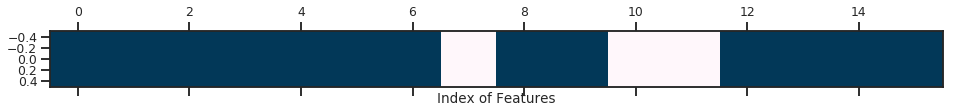

In [62]:
mask = feature_select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='PuBu')
plt.xlabel('Index of Features')

In [63]:
print("Feature omitted by automatic feature selection thru LinearSVC : %s"%(X_train_scaled.columns[[7,10,11]]))
X_test_fs1 = feature_select.transform(X_test_scaled)

Feature omitted by automatic feature selection thru LinearSVC : Index(['Family_4', 'Education_3', 'Age'], dtype='object')


In [64]:
models_list = bulk_train(X_train_fs1, y_train_scaled, X_test_fs1, y_test_scaled, no_classifiers = 6, verbose=False)

Logistic Regression : Mean Accuracy from CV is 95.7148382552394 %
Logistic Regression : Standard Deviation from CV 0.7637664074777079 %
Nearest Neighbors : Mean Accuracy from CV is 95.88528722683452 %
Nearest Neighbors : Standard Deviation from CV 0.6559682495904073 %
Decision Tree : Mean Accuracy from CV is 97.8852142233231 %
Decision Tree : Standard Deviation from CV 0.49966197126828876 %
Random Forest : Mean Accuracy from CV is 97.82880629929339 %
Random Forest : Standard Deviation from CV 0.4071784252710049 %
Naive Bayes : Mean Accuracy from CV is 89.08631650637382 %
Naive Bayes : Standard Deviation from CV 1.225426156032006 %
Support Vector : Mean Accuracy from CV is 97.28619149077602 %
Support Vector : Standard Deviation from CV 0.6393603328047534 %


In [65]:
print("\n")
print("##### AFTER AUTOMATED FEATURE SELECTION: CONSOLIDATED MODEL TRAINING SUMMARY #####")
print("############### ######################## ###################")
log_train_summary(models_list)




##### AFTER AUTOMATED FEATURE SELECTION: CONSOLIDATED MODEL TRAINING SUMMARY #####
############### ######################## ###################
            classifier  train_score  test_score  train_time
3        Random Forest     0.988857    0.983333    1.071485
5       Support Vector     0.977143    0.978000    0.048371
2        Decision Tree     1.000000    0.973333    0.003023
0  Logistic Regression     0.957714    0.962667    0.013006
1    Nearest Neighbors     0.969143    0.960000    0.048031
4          Naive Bayes     0.892286    0.897333    0.001765


In [66]:
print("############### ######################## ###################")
#### Printing Confusion Matrix #####
confusion_matrix_df = print_confusion_matrix(models_list, X_test_fs1)


############### ######################## ###################

###### Confusion Matrix Summary for [Logistic Regression] ######

[[1332   11]
 [  45  112]]

###### Classification Report for [Logistic Regression] ######

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.91      0.71      0.80       157

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.94      0.85      0.89      1500
weighted avg       0.96      0.96      0.96      1500


###### Confusion Matrix Summary for [Nearest Neighbors] ######

[[1343    0]
 [  60   97]]

###### Classification Report for [Nearest Neighbors] ######

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1343
           1       1.00      0.62      0.76       157

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.98      0.81      0.87      1500
weighted avg       0.96     

In [67]:
confusion_matrix_df

,classifer,True_Positive,True_Negative,False_Postive,False_Negative,Train_AccuracyScore,Test_AccuracyScore,CrossVal_Accuracy%,CrossVal_STD
0,Logistic Regression,112,1332,11,45,0.957714,0.962667,95.714838,0.763766
1,Nearest Neighbors,97,1343,0,60,0.969143,0.960000,95.885287,0.655968
2,Decision Tree,138,1322,21,19,1.000000,0.973333,97.885214,0.499662
3,Random Forest,133,1342,1,24,0.988857,0.983333,97.828806,0.407178
4,Naive Bayes,95,1251,92,62,0.892286,0.897333,89.086317,1.225426
5,Support Vector,125,1342,1,32,0.977143,0.978000,97.286191,0.639360


### Observation/Conclusion after Auto Feature Selection technique using LinearSVC with L1 Regularization :

#### Attempt 3

When "LinearSVC" model was used to select the relevant features using SelectFromModel API, 'Family_4', 'Education_2', 'Age' were ignored before the model training. 
After filtering the omitted features, retraining DID NOT provide any betterment from previous model evaluations except for Support Vector Classification algorithm.
i.e. Logistics Regressin, KNN and Naive Bayes did not have much improvement in F1 score(for class 1), Train/Test scores and Standard deviations. 
However Support Vector Classification had significant reduction in Mis-Classifictaion errors(i.e. reduction of false negatives) + F1 score for class 1 improved to 0.90 from 0.88 (Model improved 2% more to identify the customers purchasing the loan).

##### Conclusion Based on this feature selection technique using LinearSVC - Support Vector Classification did better. No change in Logistics regression, KNN and Naive Bayes compared to Attempt 1 & Attempt 2

Original Training set shape:  (3500, 16)
After feature selection, Training set shape:  (3500, 8)


Text(0.5, 0, 'Index of Features')

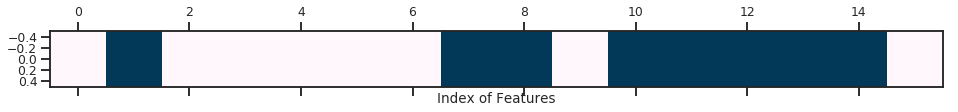

In [68]:
feature_select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
feature_select.fit(X_train_scaled, y_train_scaled)
X_train_fs2 = feature_select.transform(X_train_scaled)
print("Original Training set shape: ", X_train_scaled.shape)
print("After feature selection, Training set shape: ", X_train_fs2.shape)
mask = feature_select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='PuBu')
plt.xlabel('Index of Features')


In [69]:
print("Feature OMITTED by automatic feature selection thru Random Forest : %s"%(X_train_scaled.columns[[0,2,3,4,5,6,9,15]]))
print("############################################################################")
print("Feature CONSIDERED by automatic feature selection thru Random Forest : %s"%(X_train_scaled.columns[[1,7,8,10,11,12,13,14]]))
X_test_fs2 = feature_select.transform(X_test_scaled)

Feature OMITTED by automatic feature selection thru Random Forest : Index(['Securities_Account', 'Online', 'CreditCard', 'Family_1', 'Family_2',
       'Family_3', 'Education_2', 'Mortgage'],
      dtype='object')
############################################################################
Feature CONSIDERED by automatic feature selection thru Random Forest : Index(['CD_Account', 'Family_4', 'Education_1', 'Education_3', 'Age',
       'Experience', 'Income', 'CCAvg'],
      dtype='object')


In [70]:
models_list = bulk_train(X_train_fs2, y_train_scaled, X_test_fs2, y_test_scaled, no_classifiers = 6, verbose=False)

Logistic Regression : Mean Accuracy from CV is 95.40063254160674 %
Logistic Regression : Standard Deviation from CV 0.8393231229236656 %
Nearest Neighbors : Mean Accuracy from CV is 96.82847510125447 %
Nearest Neighbors : Standard Deviation from CV 0.6052191315198083 %
Decision Tree : Mean Accuracy from CV is 96.74300408283216 %
Decision Tree : Standard Deviation from CV 0.9479566279812952 %
Random Forest : Mean Accuracy from CV is 97.62880489986507 %
Random Forest : Standard Deviation from CV 0.4420983872332986 %
Naive Bayes : Mean Accuracy from CV is 89.54378869565114 %
Naive Bayes : Standard Deviation from CV 1.3462707702089525 %
Support Vector : Mean Accuracy from CV is 97.05729166302233 %
Support Vector : Standard Deviation from CV 0.6751275974374114 %


In [71]:
print("\n")
print("##### AFTER AUTOMATED FEATURE SELECTION: CONSOLIDATED MODEL TRAINING SUMMARY #####")
print("############### ######################## ###################")
log_train_summary(models_list)



##### AFTER AUTOMATED FEATURE SELECTION: CONSOLIDATED MODEL TRAINING SUMMARY #####
############### ######################## ###################
            classifier  train_score  test_score  train_time
3        Random Forest     0.989143    0.978000    1.017322
5       Support Vector     0.973429    0.972667    0.036996
1    Nearest Neighbors     0.979143    0.971333    0.018886
2        Decision Tree     1.000000    0.968000    0.002756
0  Logistic Regression     0.954286    0.956667    0.008628
4          Naive Bayes     0.896286    0.906667    0.001387


In [72]:
print("############### ######################## ###################")
#### Printing Confusion Matrix #####
confusion_matrix_df = print_confusion_matrix(models_list, X_test_fs2)

############### ######################## ###################

###### Confusion Matrix Summary for [Logistic Regression] ######

[[1332   11]
 [  54  103]]

###### Classification Report for [Logistic Regression] ######

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.90      0.66      0.76       157

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.95      1500


###### Confusion Matrix Summary for [Nearest Neighbors] ######

[[1340    3]
 [  40  117]]

###### Classification Report for [Nearest Neighbors] ######

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.97      0.75      0.84       157

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.97      0.87      0.91      1500
weighted avg       0.97     

In [73]:
confusion_matrix_df

,classifer,True_Positive,True_Negative,False_Postive,False_Negative,Train_AccuracyScore,Test_AccuracyScore,CrossVal_Accuracy%,CrossVal_STD
0,Logistic Regression,103,1332,11,54,0.954286,0.956667,95.400633,0.839323
1,Nearest Neighbors,117,1340,3,40,0.979143,0.971333,96.828475,0.605219
2,Decision Tree,125,1327,16,32,1.000000,0.968000,96.743004,0.947957
3,Random Forest,126,1341,2,31,0.989143,0.978000,97.628805,0.442098
4,Naive Bayes,100,1260,83,57,0.896286,0.906667,89.543789,1.346271
5,Support Vector,119,1340,3,38,0.973429,0.972667,97.057292,0.675128


### Observation/Conclusion after Auto Feature Selection technique thru Random Forest:

#### Attempt 4

When "RandomForestClassifier" model was used to select the relevant features from select from model API, half of the features were ignored as irrelevant based on feature importance.

##### Features marked as NOT Important
'Securities_Account', 'Online', 'CreditCard', 'Family_1', 'Family_2','Family_3', 'Education_2', 'Mortgage'
##### Features marked as Important
'CD_Account', 'Family_4', 'Education_1', 'Education_3', 'Age','Experience', 'Income', 'CCAvg'

##### Remarks on above feature selection technique :
It kind of makes sense as it seem like, features that were having relatively stronger correlation within themselves were marked as not important.

##### Conclusion 1:
After filtering the omitted features, KNN's true positives improved + F1 score for class 1 improved + Standard deviation decreased + train/test score increased + Mis-Classification errors reduced
##### Conclusion 2:
Logistics Regression & Naive Bayes have small decrease in perforamce for F1 score, standard deviation, train/test score parameters.
##### Conclusion 3:
Hence, would rank KNN as first, Logistics regression as second & Naive Bayes as Third.
Random Forest and Support Vector did better in Attempt 3 compared to Attempt 4, though both these still perform better than KNN and logistics regression



## Final Conclusion

Overall we did EDA of features/target, attempt ML model with FOUR different feature engineering strategies - 1) AS IS taking all the features 2) Scaling the continuous features 3) Automated feature selection using LinearSVC 4) Automated Feature selection using Random Forest Classifier. Below would be the consolidated summary.

##### NOTE : LR represents Logistics Regression, KNN represents Nearest Neighbors, NB represents Naive Bayes in below summary
### AS IS,Taking all the features

1. **F1 score(for class 1 i.e. customers to purchase loan):** LR 0.81, KNN 0.40 NB 0.56
2. **Train/cross validated TestScore:** LR 0.96, KNN 0.94, NB 0.89
3. **Standard deviation observed:** LR 0.93%, KNN 1.23%, NB 1.27%
4. **Number of Mis-classifications:** LR 54, KNN 153, NB 149

### Scaling of Continuous Features

1. **F1 score(for class 1 i.e. customers to purchase loan):** LR 0.80, KNN 0.74 NB 0.56
2. **Train/cross validated TestScore:** LR 0.96, KNN 0.97, NB 0.89
3. **Standard deviation observed:** LR 0.78%, KNN 0.77%, NB 1.24%
4. **Number of Mis-classifications:** LR 55, KNN 64, NB 149

### Automated feature selection using linear SVC

1. **F1 score(for class 1 i.e. customers to purchase loan):** LR 0.80, KNN 0.78 NB 0.55
2. **Train/cross validated TestScore:** LR 0.96, KNN 0.97, NB 0.89
3. **Standard deviation observed:** LR 0.78%, KNN 0.72%, NB 1.2%
4. **Number of Mis-classifications:** LR 55, KNN 58, NB 154

### Automated feature selection using Random Forest Classifier

1. **F1 score(for class 1 i.e. customers to purchase loan):** LR 0.76, KNN 0.84 NB 0.59
2. **Train/cross validated TestScore:** LR 0.95, KNN 0.97, NB 0.89
3. **Standard deviation observed:** LR 0.83%, KNN 0.6%, NB 1.3%
4. **Number of Mis-classifications:** LR 65, KNN 43, NB 140


From observations around all the different approaches, Logistics Regression has consistently performed with higher training/test score and higher F1 score for class 1 that can identify the customers who can purchase loan and lower standard deviations(less than 5%) and very low miss classifications of false negatives and false positives. 
Hence I would prefer Logistics Regression as best model among the three i.e. between Logistics Regression, KNN and Naive Bayes. 

If hyper parameter tuning using grid search & resampling of minority class can be done on Logistics Regression along with weight calculation of different class labels, model has potential to become more stable to predict with 98% of accuracy all the time for identification of customers to purchase loan.

##### Note : I kept Support Vector machine, Decision Tree and Random Forest in equation during training phase in all different approaches, and it is very evident that Logistics Regression, Support Vector Machine and Random Forest consistently performed better while evaulating the model using above evaluation criteria.

In [74]:
############################################################################################################
################# Beyond Conclusion - Model Optimization ###################################################
############################################################################################################

### So far, we have X_train - Original Feature set ####################
### X_train_scaled - Feature set with normalized continuous features ###
### X_train_fs1 - Array of features selected by SVC ####################
### X_train_fs2 - Array of features selected by RandomForestClassifer ##
########################################################################

In [75]:
###################################################################################################
##### Experiment to use logistics Regression model fine tuning by calculating class weight for both
############# majority and minority class and evaluate on test data ################################
###################################################################################################
from sklearn.utils import class_weight

class_weight.compute_class_weight('balanced', np.unique(y_train_scaled), y_train_scaled)
clf_weighted = LogisticRegression(random_state=0,class_weight='balanced').fit(X_train_scaled, y_train_scaled)
y_pred = clf_weighted.predict(X_test_scaled)

In [76]:
############################################################################
#### How class weights have been calculated ################################
##### Class 0 has been majority population and has been penalized rightly###
##### Class 1 has been minority population and has been rewarded rightly ###
############################################################################
class_weight.compute_class_weight('balanced', np.unique(y_train_scaled), y_train_scaled)

array([0.55083412, 5.41795666])

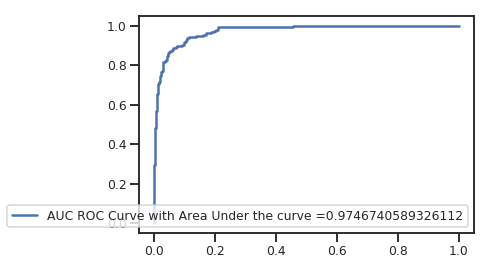

In [77]:
#AUC curve of Logistics Regression post class weight calcuation for majority and minority class
generate_auc_roc_curve(clf_weighted, X_test_scaled)

In [78]:
###############################################################
#Hyper parameter tuning between 2 classification models #######
### choosing Logistics Regression & Random Forest because #####
######### these 2 models have consistently did better #########
############ based on above evaluation summary ################
###############################################################

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
n_folds = 5
pipe = Pipeline([('model_gs' , LogisticRegression())])

param_grid_logisticsRegression = [
    {'model_gs' : [LogisticRegression(class_weight='balanced')],
     'model_gs__penalty' : ['l2'],
     'model_gs__C' : [0.0001, 0.0005, 0.001, 0.01, 0.1, 
                      1, 10, 25, 35, 40, 
                      50, 75, 90, 100,120, 150, 250, 500,1000],
    'model_gs__solver' : ['liblinear']}
]


#choosing njobs as -1 to have parallel processing
grid = GridSearchCV(pipe, param_grid = param_grid_logisticsRegression,cv = n_folds, verbose=True, n_jobs=-1)

In [105]:
def plot_crossval_grap(best_grid_search_model, x_range) :
    ### Extract mean score, standard deviation from the best fit model ###
    scores_avg = np.array(best_grid_search_model.cv_results_['mean_test_score'])
    scores_std = best_grid_search_model.cv_results_['std_test_score']
    ### This is masked array, hence we need to use filled to convert this to normal array
    x_crange = best_grid_search_model.cv_results_[x_range].filled()
    std_error = scores_std / np.sqrt(n_folds)
    
    scores_avg = np.array(best_grid_search_model.cv_results_['mean_test_score'])
    #print(scores_avg.shape)
    scores_std = best_grid_search_model.cv_results_['std_test_score']
    ### This is masked array, hence we need to use filled to convert this to normal array
    x_crange = best_grid_search_model.cv_results_[x_range].filled()
    #print(x_crange.shape)
    std_error = scores_std / np.sqrt(n_folds)
    plt.figure().set_size_inches(12, 10)
    plt.semilogx(x_crange, scores_avg)
    
    plt.semilogx(x_crange, scores_avg + std_error, 'r--')
    plt.semilogx(x_crange, scores_avg - std_error, 'r--')
    plt.ylabel('CV score +/- std error')
    plt.xlabel('Range of C - Plotting GridSearch CV')
    plt.axhline(np.max(scores_avg), linestyle='--', color='green')
    plt.xlim([x_crange[0], x_crange[-1]])

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.4s finished


Best Estimator :  Pipeline(memory=None,
     steps=[('model_gs', LogisticRegression(C=40, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
Training Score : 0.8997
Testing Score : 0.8987


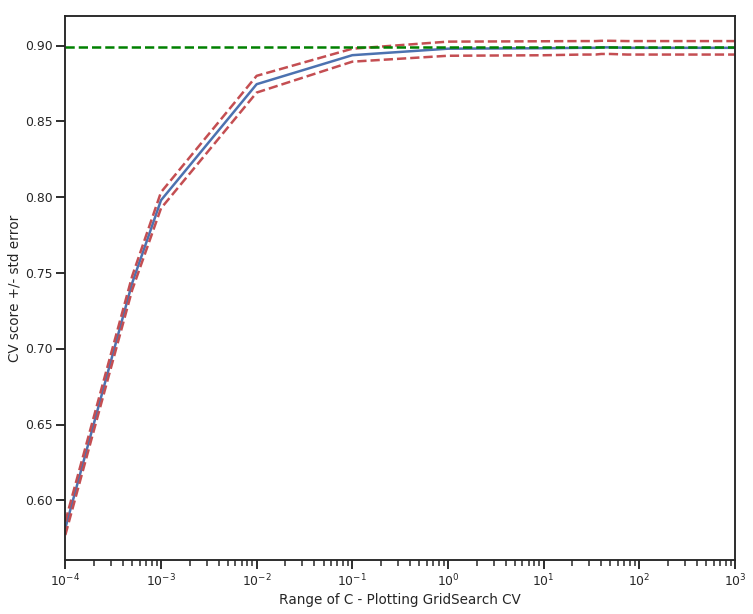

In [110]:
best_clf_1 = grid.fit(X_train_scaled, y_train_scaled)
plot_crossval_grap(best_clf_1,'param_model_gs__C')
best_clf_1.best_estimator_
print("Best Estimator : ", best_clf_1.best_estimator_)
print("Training Score : %.4f"%(best_clf_1.score(X_train_scaled, y_train_scaled)))
print("Testing Score : %.4f"%(best_clf_1.score(X_test_scaled, y_test_scaled)))

In [84]:
#### Avaiable paramters to Tune ####
best_clf_1.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'model_gs', 'model_gs__C', 'model_gs__class_weight', 'model_gs__dual', 'model_gs__fit_intercept', 'model_gs__intercept_scaling', 'model_gs__max_iter', 'model_gs__multi_class', 'model_gs__n_jobs', 'model_gs__penalty', 'model_gs__random_state', 'model_gs__solver', 'model_gs__tol', 'model_gs__verbose', 'model_gs__warm_start'])

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.6s finished


Best Estimator :  Pipeline(memory=None,
     steps=[('model_gs', LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
Training Score : 0.8997
Testing Score : 0.8980


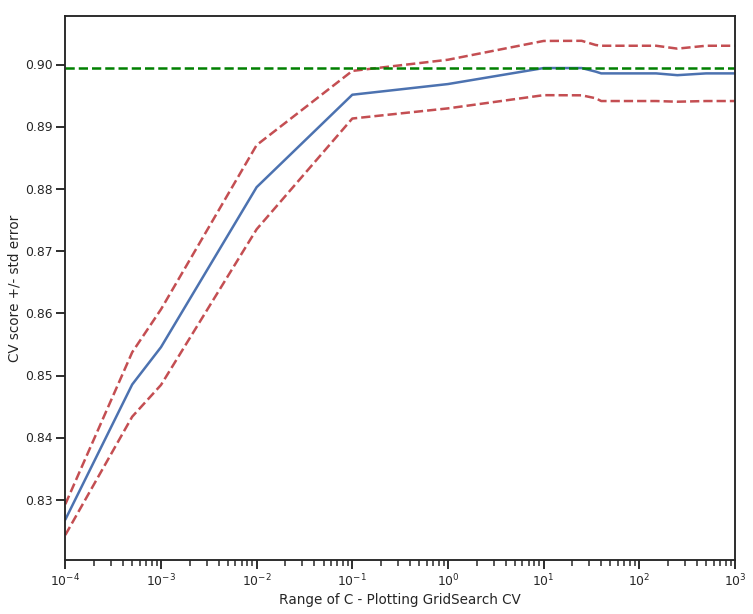

In [109]:
best_clf_2 = grid.fit(X_train, y_train)
plot_crossval_grap(best_clf_2,'param_model_gs__C')
print("Best Estimator : ", best_clf_2.best_estimator_)
print("Training Score : %.4f"%(best_clf_2.score(X_train, y_train)))
print("Testing Score : %.4f"%(best_clf_2.score(X_test, y_test)))

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.4s finished


Best Estimator :  Pipeline(memory=None,
     steps=[('model_gs', LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
Training Score : 0.9000
Testing Score : 0.9007


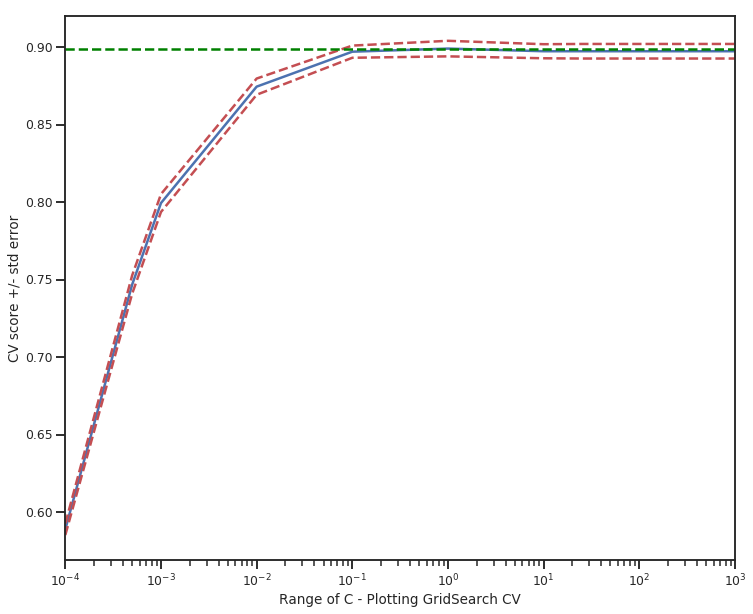

In [108]:
best_clf_3 = grid.fit(X_train_fs1, y_train_scaled)
plot_crossval_grap(best_clf_3, 'param_model_gs__C')
print("Best Estimator : ", best_clf_3.best_estimator_)
print("Training Score : %.4f"%(best_clf_3.score(X_train_fs1, y_train_scaled)))
print("Testing Score : %.4f"%(best_clf_3.score(X_test_fs1, y_test_scaled)))

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.3s finished


Best Estimator :  Pipeline(memory=None,
     steps=[('model_gs', LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
Training Score : 0.8943
Testing Score : 0.8947


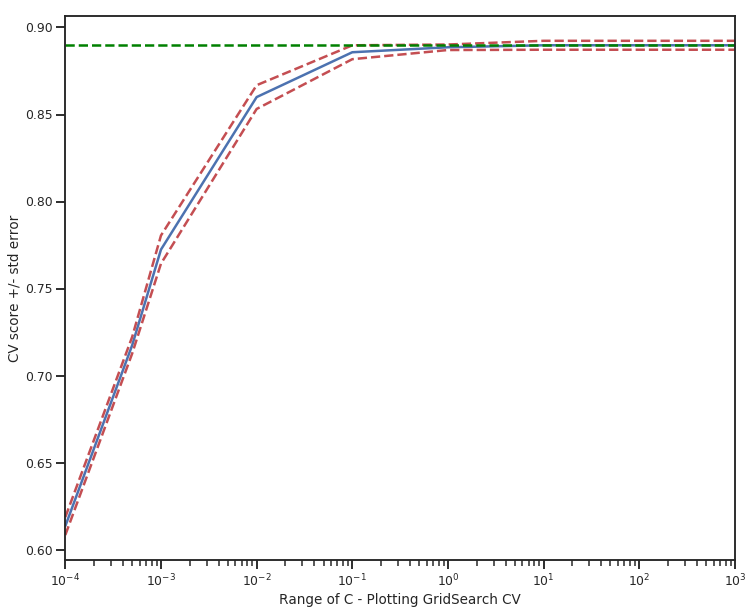

In [107]:
best_clf_4 = grid.fit(X_train_fs2, y_train_scaled)
plot_crossval_grap(best_clf_4, 'param_model_gs__C')
print("Best Estimator : ", best_clf_4.best_estimator_)
print("Training Score : %.4f"%(best_clf_4.score(X_train_fs2, y_train_scaled)))
print("Testing Score : %.4f"%(best_clf_4.score(X_test_fs2, y_test_scaled)))

In [ ]:
#### NOTE : Test Score, after above optimization has gone lesser than Train score ######
################ Applied L1 penalty, C = 0.0001 after grid search #####################
################# Model is no longer overfitting #######################################
########################################################################################

In [88]:
param_grid_trees = [
    {'model_gs' : [RandomForestClassifier(class_weight='balanced')],
     'model_gs__max_depth': [24, 32, 40],     
     'model_gs__min_samples_leaf': [1, 2],
     'model_gs__n_estimators': [250,300, 350]}
]
param_grid_trees

[{'model_gs': [RandomForestClassifier(bootstrap=True, class_weight='balanced',
               criterion='gini', max_depth=None, max_features='auto',
               max_leaf_nodes=None, min_impurity_decrease=0.0,
               min_impurity_split=None, min_samples_leaf=1,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
               n_estimators='warn', n_jobs=None, oob_score=False,
               random_state=None, verbose=0, warm_start=False)],
  'model_gs__max_depth': [24, 32, 40],
  'model_gs__min_samples_leaf': [1, 2],
  'model_gs__n_estimators': [250, 300, 350]}]

In [90]:
grid_rf = GridSearchCV(pipe, param_grid = param_grid_trees,cv = n_folds, verbose=True, n_jobs=-1)
best_clf_rf = grid_rf.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.4s finished


Best Estimator :  Pipeline(memory=None,
     steps=[('model_gs', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=24, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])
Training Score : 1.0000
Testing Score : 0.9893


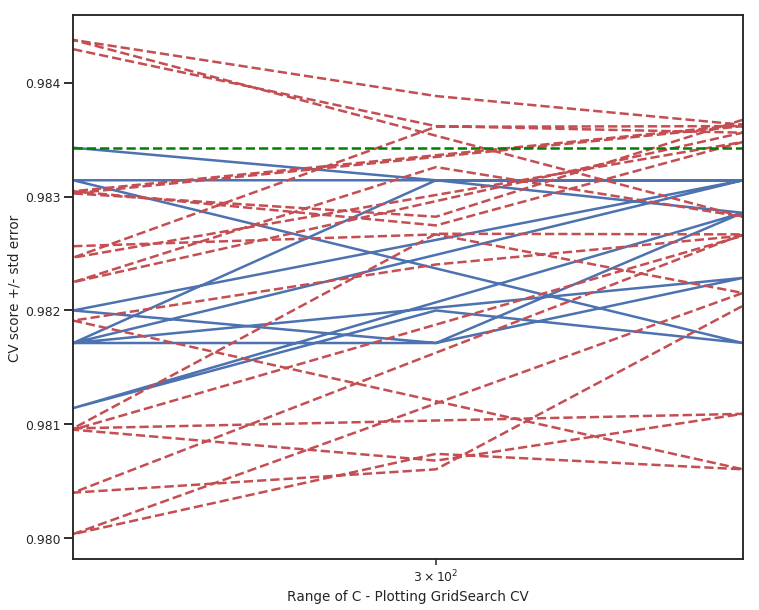

In [111]:
from sklearn.metrics import roc_auc_score
plot_crossval_grap(best_clf_rf, 'param_model_gs__n_estimators')
print("Best Estimator : ", best_clf_rf.best_estimator_)
print("Training Score : %.4f"%(best_clf_rf.score(X_train_scaled, y_train_scaled)))
print("Testing Score : %.4f"%(best_clf_rf.score(X_test_scaled, y_test_scaled)))

[[1342    1]
 [  15  142]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.90      0.95       157

   micro avg       0.99      0.99      0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500

ROC AUC Score:  0.9988736121716283


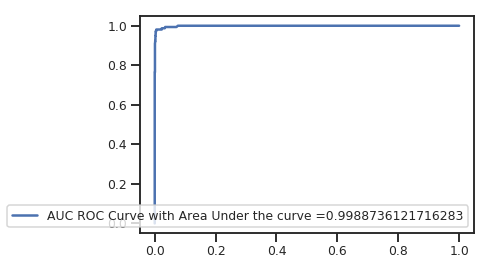

In [113]:
########## True, Negatives, False Positives, True Positives, False Negatives of Random Forest###
####################### Post Grid Search Optimizations #########################################
grid_rf_pred = best_clf_rf.predict(X_test_scaled)
print(confusion_matrix(y_test_scaled, grid_rf_pred))
print(classification_report(y_test_scaled, grid_rf_pred))

y_pred_proba = best_clf_rf.predict_proba(X_test_scaled)
print("ROC AUC Score: ", roc_auc_score(y_test_scaled, y_pred_proba[:,1]))
#AUC curve of Logistics Regression post class weight calcuation for majority and minority class
generate_auc_roc_curve(best_clf_rf, X_test_scaled)

######### Class 1 prediction accuracy(F1) is 95% which is very good, as class 1 belonged to MINORITY ##
############# ONLY ONE FALSE POSITIVE and 15 FALSE NEGATIVE, LOWEST AMONG ALL THE MODELs ABOVE ########
###################### This Score is on Test set, i.e. Unseen data ####################################
############## This model has better chance of identifying the customer to purchase loan ##############
#######################################################################################################

[[1201  142]
 [  10  147]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1343
           1       0.51      0.94      0.66       157

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.75      0.92      0.80      1500
weighted avg       0.94      0.90      0.91      1500

ROC AUC Score:  0.9749681054393862


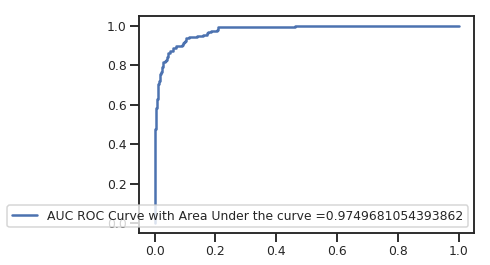

In [114]:
########## True, Negatives, False Positives, True Positives, False Negatives of Random Forest###
####################### Post Grid Search Optimizations #########################################
grid_logisticsreg_pred = best_clf_1.predict(X_test_scaled)
confusion_matrix(y_test_scaled, grid_logisticsreg_pred)

print(confusion_matrix(y_test_scaled, grid_logisticsreg_pred))
print(classification_report(y_test_scaled, grid_logisticsreg_pred))

y_pred_proba_lg = best_clf_1.predict_proba(X_test_scaled)
print("ROC AUC Score: ", roc_auc_score(y_test_scaled, y_pred_proba_lg[:,1]))
#AUC curve of Logistics Regression post class weight calcuation for majority and minority class
generate_auc_roc_curve(best_clf_1, X_test_scaled)


######### Class 1 prediction accuracy(F1) is 66% which is average, as class 1 belonged to MINORITY ####
############## This model has 66% chance of identifying the customer to purchase loan #################
#######################################################################################################

##### Additional Conclusion - After hyper parameter tuning/model optimization techniques applied on logistics regression & Random Forest, lowest mis-classification rate (False Negatives & False Positives) on test set and Highest Accuracy on training set was observed to be from Random Forest model. 

### Fine tuned model has 95% chance of identifying customers who can purchase the loan from bank